# Problem Statement 1

Implementing Feedforward neural networks with Keras and TensorFlow for classification of hand-written MNIST dataset using below steps:

a. Import the Necessary Packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

b. Load the Training and Testing Data:

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images to a 1D array
x_train = x_train.reshape((-1, 32*32*3))
x_test = x_test.reshape((-1, 32*32*3))

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170498071/170498071 [==============================] - 3s 0us/step


c. Define the Network Architecture Using Keras:

In [3]:
# Define the network architecture using Keras
model = Sequential()
model.add(Dense(512, input_shape=(32*32*3,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

d. Train the Model Using Stochastic Gradient Descent (SGD):

In [5]:
# Train the model using Stochastic Gradient Descent (SGD)
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=11, validation_data=(x_test, y_test))

Epoch 1/11
391/391 [==============================] - 15s 38ms/step - loss: 1.7335 - accuracy: 0.3936 - val_loss: 1.7071 - val_accuracy: 0.4037
Epoch 2/11
391/391 [==============================] - 12s 31ms/step - loss: 1.6819 - accuracy: 0.4115 - val_loss: 1.6974 - val_accuracy: 0.3887
Epoch 3/11
391/391 [==============================] - 15s 39ms/step - loss: 1.6395 - accuracy: 0.4242 - val_loss: 1.6500 - val_accuracy: 0.4174
Epoch 4/11
391/391 [==============================] - 11s 28ms/step - loss: 1.6108 - accuracy: 0.4370 - val_loss: 1.6478 - val_accuracy: 0.4166
Epoch 5/11
391/391 [==============================] - 13s 33ms/step - loss: 1.5794 - accuracy: 0.4479 - val_loss: 1.5898 - val_accuracy: 0.4377
Epoch 6/11
391/391 [==============================] - 10s 25ms/step - loss: 1.5537 - accuracy: 0.4566 - val_loss: 1.5560 - val_accuracy: 0.4523
Epoch 7/11
391/391 [==============================] - 11s 29ms/step - loss: 1.5311 - accuracy: 0.4646 - val_loss: 1.5470 - val_accuracy:

e. Evaluate the Network:

In [7]:
# Evaluate the network
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.5340373516082764
Test accuracy: 0.44749999046325684


f. Plot the Training Loss and Accuracy:

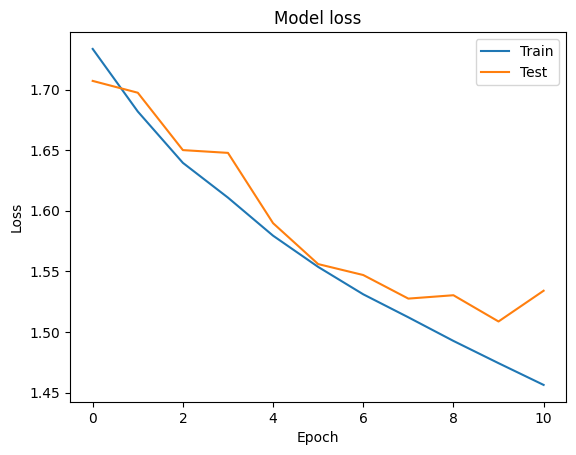

In [9]:
# Plot the training loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

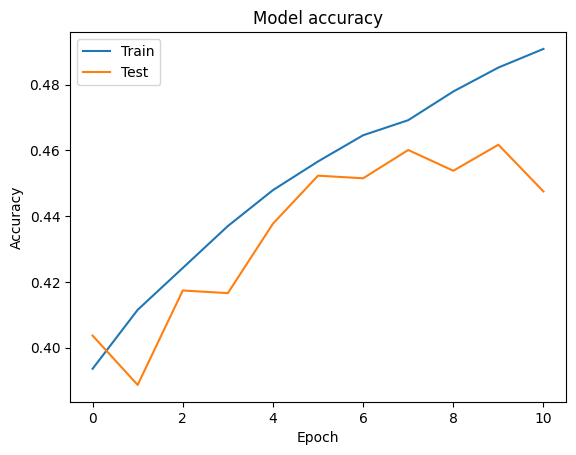

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()